In [2]:
suppressMessages(library(dplyr))
suppressMessages(library(ggplot2))
suppressMessages(library(svglite))
suppressMessages(library(EnsDb.Hsapiens.v86))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(repr))
suppressMessages(library(tidyverse))

Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"


In [2]:
# get seurat obj
SAMPLE = 'rcmb56-ht'
if (SAMPLE == 'rcmb56-ht'){
    rdsfile = '../../2021-08-29_seurat/rcmb56-ht_seuratobjdfclean.rds'
} else if (SAMPLE == 'rcmb56-pdx'){
    rdsfile = '../../2021-08-29_seurat/rcmb56-pdx_xenocelldfcleanseuratobj.rds'
}
seuratobj <- readRDS(rdsfile)
DefaultAssay(seuratobj) <- 'SCT'

In [3]:
# Assign our best guess at cell ids
new.cluster.ids <- c("ecDNA- tumor", "ecDNA- tumor", "ecDNA- tumor", "ecDNA- MT high tumor", "ecDNA- tumor", "ecDNA- tumor",
    "ecDNA+ tumor", "hematopoietic lineage", "oligodendrocyte", "neuron", "astrocyte", "OPC")
names(new.cluster.ids) <- levels(seuratobj)
seuratobj <- RenameIdents(seuratobj, new.cluster.ids)

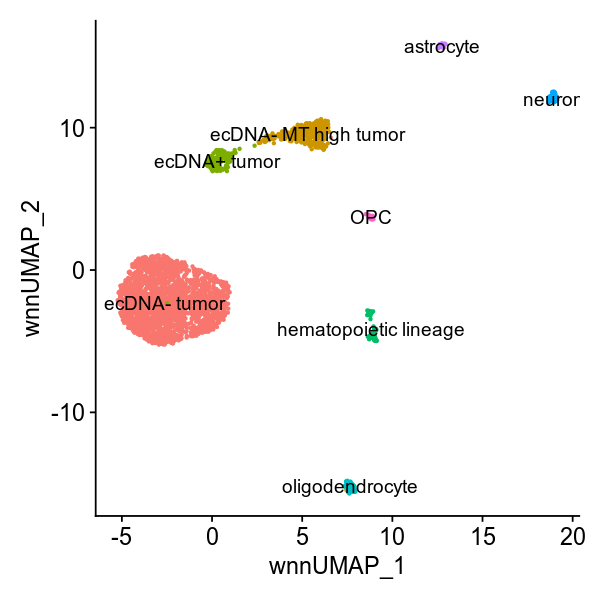

In [16]:
# Plot cell identities onto UMAP
plot <- DimPlot(seuratobj, label=TRUE, reduction = 'wnn.umap')
filename <- paste0(SAMPLE,"_celltype_umap.svg")

options(repr.plot.width = 5, repr.plot.height = 5)
theme_settings = element_text(hjust = 0.5, family="Arial", size=14)
plot <- plot & theme(text = theme_settings, axis.text=theme_settings, legend.position = "none")
plot
ggsave(file=filename,plot=plot,width=5,height=5)

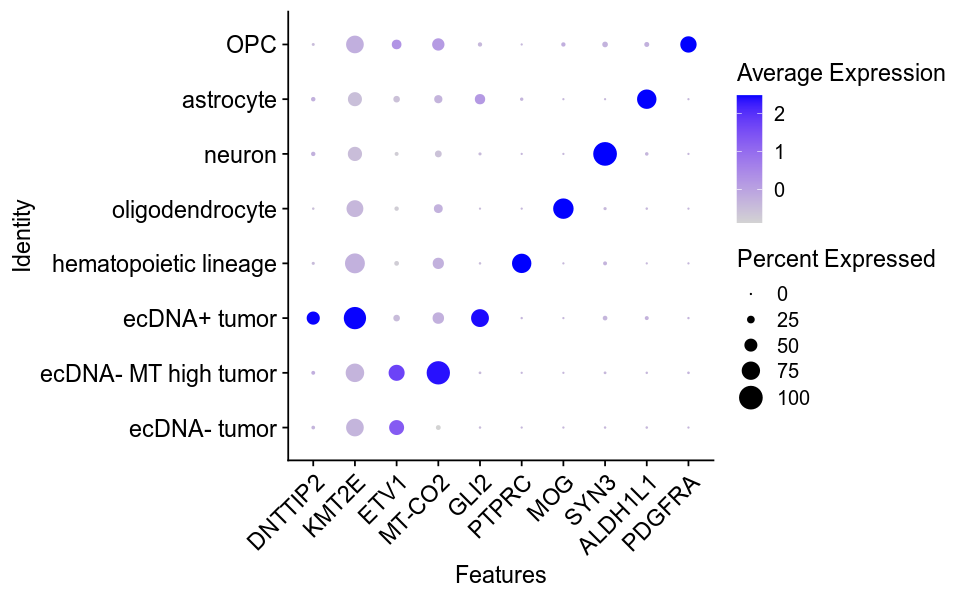

In [14]:
# Expression of marker genes
genes = c('DNTTIP2','KMT2E','ETV1','MT-CO2','GLI2','PTPRC','MOG','SYN3','ALDH1L1','PDGFRA')
plot <- DotPlot(seuratobj, features = genes) + RotatedAxis()
filename <- paste0(SAMPLE,"_celltype_gexp.svg")

options(repr.plot.width = 8, repr.plot.height = 5)
theme_settings = element_text(hjust = 0.5, family="Arial", size=14)
plot <- plot & theme(text = theme_settings, axis.text=theme_settings)#, axis.text.y=element_text(angle=45)
plot
ggsave(file=filename,plot=plot,width=8,height=5)

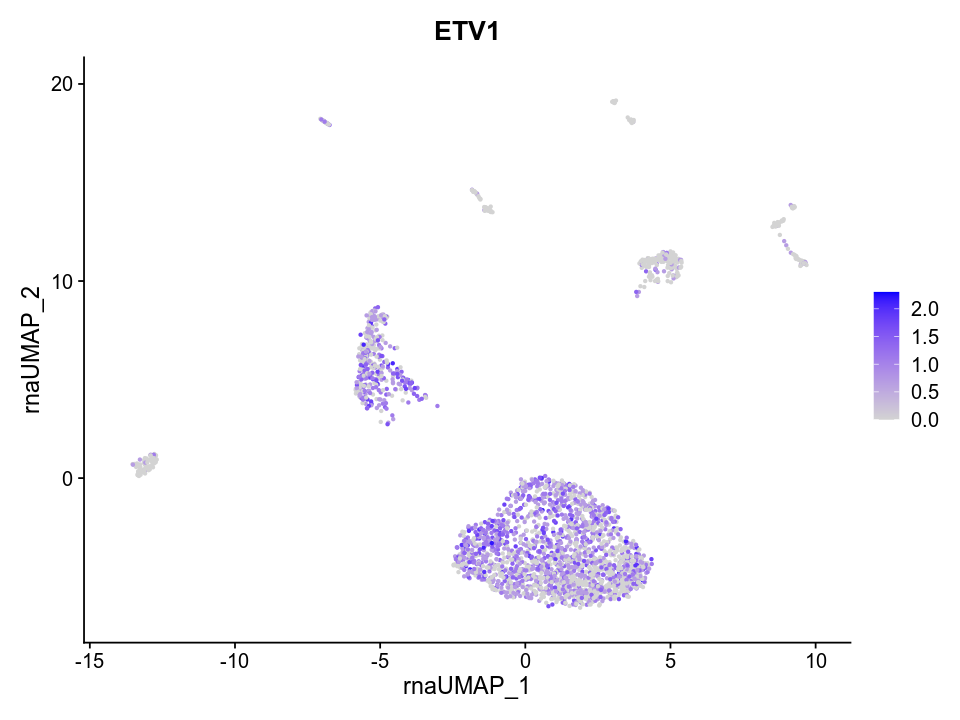

In [29]:
FeaturePlot(seuratobj,features='ETV1')

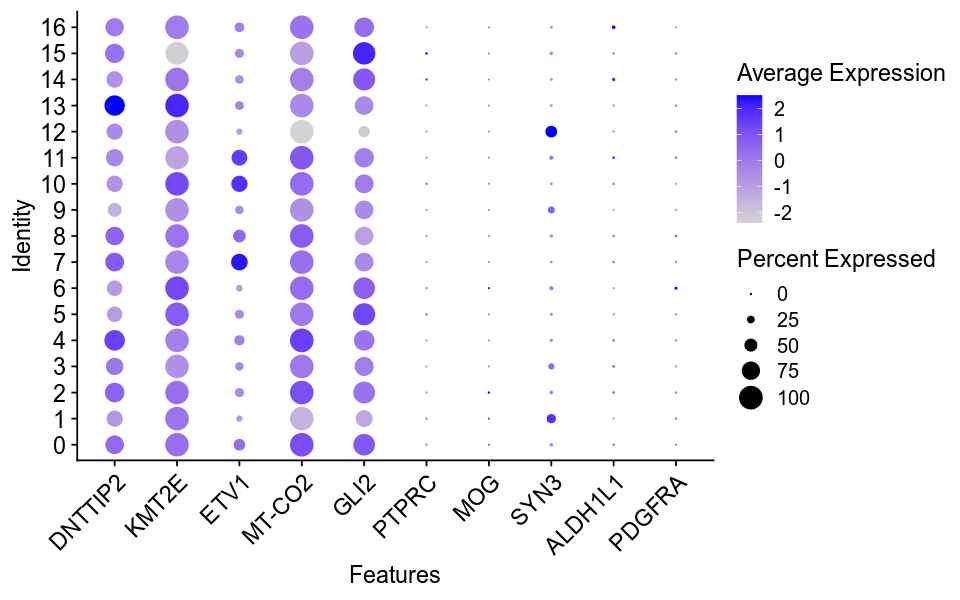

In [8]:
# Do the same for PDX:
SAMPLE = 'rcmb56-pdx'
if (SAMPLE == 'rcmb56-ht'){
    rdsfile = '../../2021-08-29_seurat/rcmb56-ht_seuratobjdfclean.rds'
} else if (SAMPLE == 'rcmb56-pdx'){
    rdsfile = '../../2021-08-29_seurat/rcmb56-pdx_xenocelldfcleanseuratobj.rds'
}
seuratobj <- readRDS(rdsfile)
DefaultAssay(seuratobj) <- 'SCT'

# Expression of marker genes
genes = c('DNTTIP2','KMT2E','ETV1','MT-CO2','GLI2','PTPRC','MOG','SYN3','ALDH1L1','PDGFRA')
plot <- DotPlot(seuratobj, features = genes) + RotatedAxis()
filename <- paste0(SAMPLE,"_celltype_gexp.png")

options(repr.plot.width = 8, repr.plot.height = 5)
theme_settings = element_text(hjust = 0.5, family="Arial", size=14)
plot <- plot & theme(text = theme_settings, axis.text=theme_settings)#, axis.text.y=element_text(angle=45)
plot
ggsave(file=filename,plot=plot,width=8,height=5)


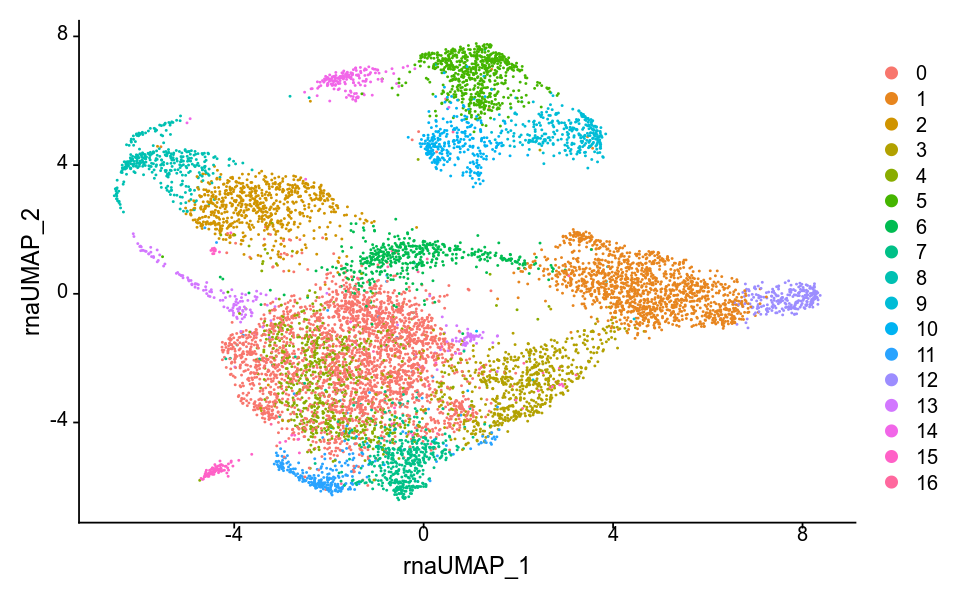

In [7]:
DimPlot(seuratobj)